In [1]:
from tensorflow.keras.datasets import fashion_mnist


In [2]:
(xtrain, ytrain),(xtest, ytest)= fashion_mnist.load_data()

In [3]:

import numpy as np

In [4]:
xtrain.shape

(60000, 28, 28)

In [7]:
xtrain = np.expand_dims(xtrain, -1)

In [8]:
xtest = np.expand_dims(xtest, -1)

In [9]:
xtrain.shape


(60000, 28, 28, 1)

In [10]:
xtrain.shape

(60000, 28, 28, 1)

In [11]:

xtrain = xtrain/255

In [12]:
xtest = xtest/255

In [13]:
import tensorflow as tf

In [14]:
from tensorflow.keras.layers import Dense, Input, Conv2D

In [15]:
from tensorflow.keras.models import Model

In [16]:
from tensorflow.keras.layers import Flatten

In [17]:
k = len(set(ytest))


In [18]:
k

10

In [19]:
i = Input(shape = xtrain[0].shape)
x= Conv2D(32, (3,3), strides=2 , activation='relu')(i)
x= Conv2D(64, (3,3), strides=2 , activation='relu')(x)
x= Conv2D(128, (3,3), strides=2 , activation='relu')(x)
x = Flatten()(x)
x= Dense (512, activation = 'relu')(x)
x = Dense (k, activation='softmax')(x)

In [20]:
model= Model(i,x)

In [21]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [22]:
r = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs = 7)

Epoch 1/7
1875/1875 [==============================] - 37s 19ms/step - loss: 0.4930 - accuracy: 0.8180 - val_loss: 0.4001 - val_accuracy: 0.8478
Epoch 2/7
1875/1875 [==============================] - 31s 17ms/step - loss: 0.3351 - accuracy: 0.8745 - val_loss: 0.3315 - val_accuracy: 0.8776
Epoch 3/7
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2795 - accuracy: 0.8951 - val_loss: 0.3289 - val_accuracy: 0.8783
Epoch 4/7
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2407 - accuracy: 0.9090 - val_loss: 0.3033 - val_accuracy: 0.8904
Epoch 5/7
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2097 - accuracy: 0.9215 - val_loss: 0.3015 - val_accuracy: 0.8983
Epoch 6/7
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1813 - accuracy: 0.9319 - val_loss: 0.3064 - val_accuracy: 0.8980
Epoch 7/7
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1555 - accuracy: 0.9402 - val_loss: 0.3292 - val_ac

In [23]:
import matplotlib.pyplot as plt

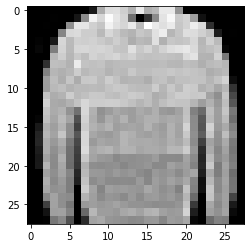

In [31]:
plt.imshow(xtest[20], cmap = 'gray')

In [36]:
ytest[0]

9

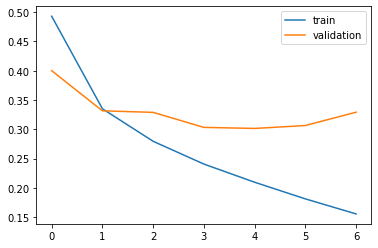

In [32]:
plt.plot(r.history['loss'], label = 'train')
plt.plot(r.history['val_loss'], label= 'validation')
plt.legend()

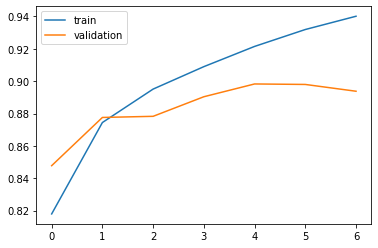

In [33]:
plt.plot(r.history['accuracy'], label = 'train')
plt.plot(r.history['val_accuracy'], label = 'validation')
plt.legend()

In [34]:
pp = model.predict(xtest)

313/313 [==============================] - 3s 9ms/step


In [35]:
pp[0]

array([2.1373434e-09, 1.0541673e-10, 3.7913686e-10, 1.5898807e-10,
       5.1825872e-08, 9.1887923e-05, 2.3833104e-09, 1.5858188e-05,
       9.8184554e-09, 9.9989218e-01], dtype=float32)

In [ ]:
pp.shape

(10000, 10)

In [37]:
ppp=[]
for i  in range(10000):
    x = pp[i,:].argmax()
    ppp.append(x)

In [41]:
x=np.random.randint(10000)
y1=ppp[x]
y2=ytest[x]
print(y1)
print(y2)

7
7
